In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

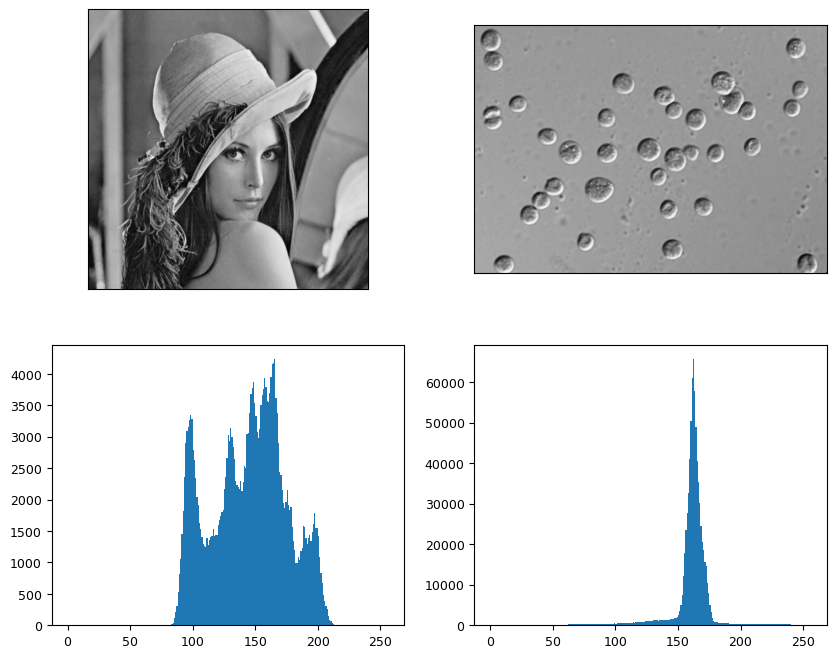

In [16]:
# Бинаризация
image1 = cv.imread('../images/lenna_bad.png')
image2 = cv.imread('../images/chlorella.png')
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
hsv_image1 = cv.cvtColor(image1, cv.COLOR_BGR2HSV)
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
rgb_image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
hsv_image2 = cv.cvtColor(image2, cv.COLOR_BGR2HSV)
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

channels = [0]
histSize = [256]
arr_range = [0, 256]

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(gray_image2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, arr_range)
plt.subplot(gs[3])
plt.hist(gray_image2.reshape(-1), 256, arr_range)
plt.show()

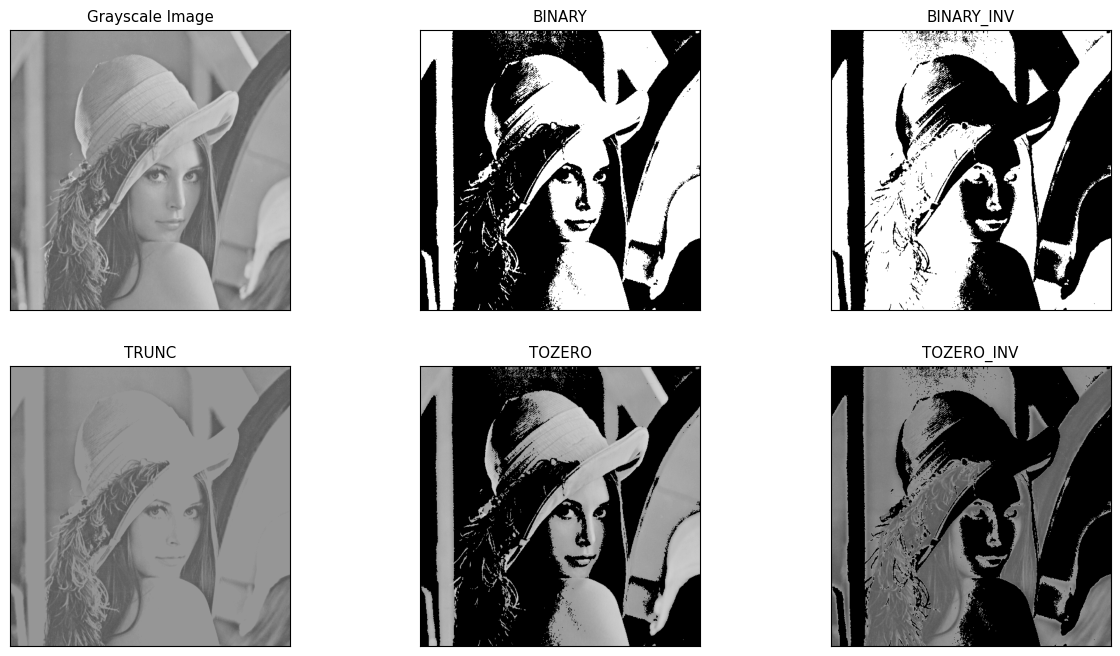

In [17]:
# Бинаризация полутоновых изображений (пороговая фильтрация)
threshold = 150
image = gray_image1

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(image, threshold, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(image, threshold, 255, cv.THRESH_TOZERO_INV)
titles = ['Grayscale Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(15, 8))
for i in np.arange(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

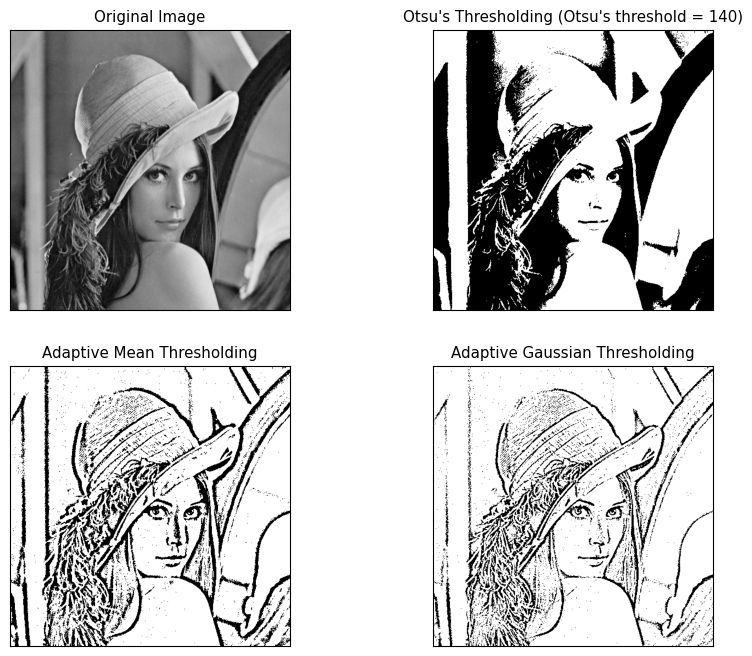

In [18]:
# Адаптивная бинаризация 
ret1, thresh1 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
thresh2 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 5)
thresh3 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 5)
titles = ['Original Image', "Otsu's Thresholding (Otsu's threshold = %d)" % ret1,
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, thresh1, thresh2, thresh3]

plt.figure(figsize=(10, 8))
for i in np.arange(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

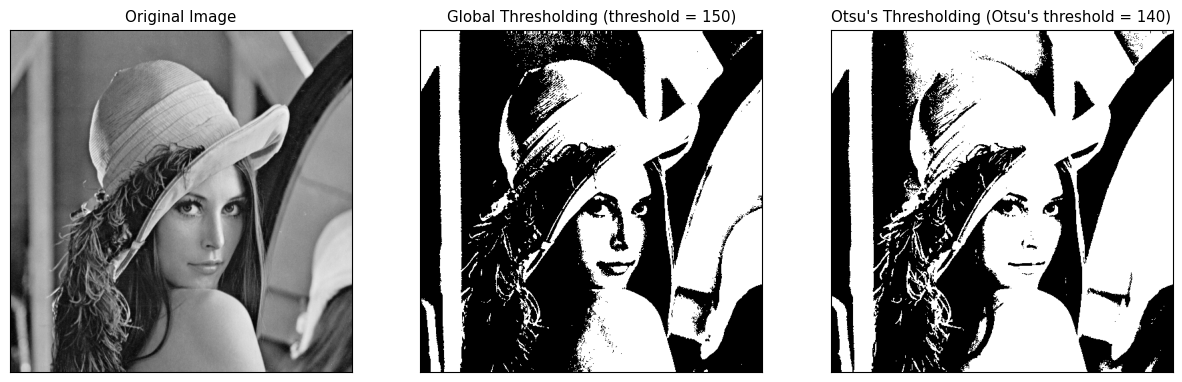

In [19]:
# Бинаризация Оцу 
threshold = 150
ret1, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
ret2, thresh2 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
titles = ['Original Image', 'Global Thresholding (threshold = %d)' % threshold,
          "Otsu's Thresholding (Otsu's threshold = %d)" % ret2]
images = [image, thresh1, thresh2]

plt.figure(figsize=(15, 8))
for i in np.arange(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

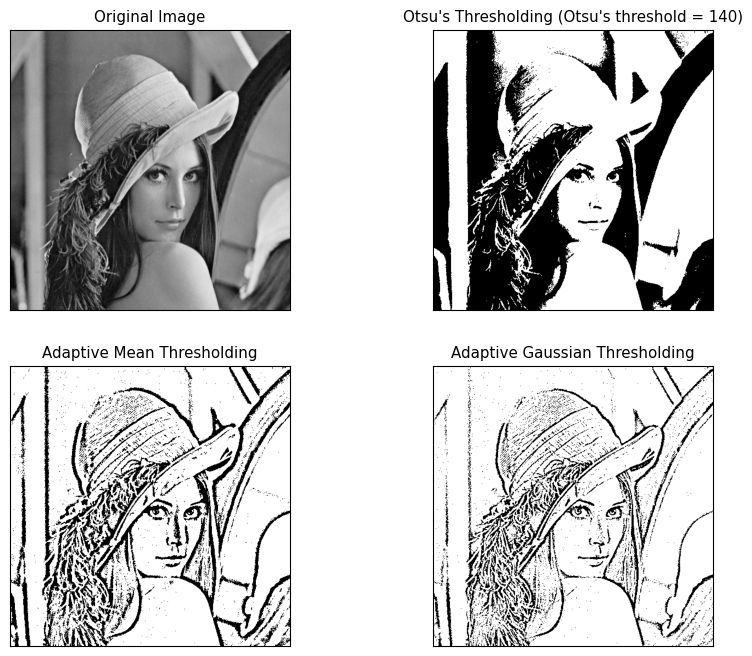

In [20]:
# Адаптивная бинаризация 

ret1, thresh1 = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
thresh2 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 5)
thresh3 = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 5)
titles = ['Original Image', "Otsu's Thresholding (Otsu's threshold = %d)" % ret1,
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, thresh1, thresh2, thresh3]

plt.figure(figsize=(10, 8))
for i in np.arange(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


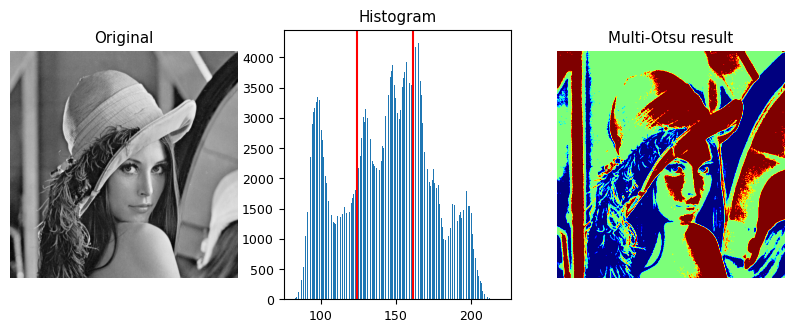

In [21]:
# Сегментация многомодальных изображений (Мультипороговая гистограммная бинаризация) 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()


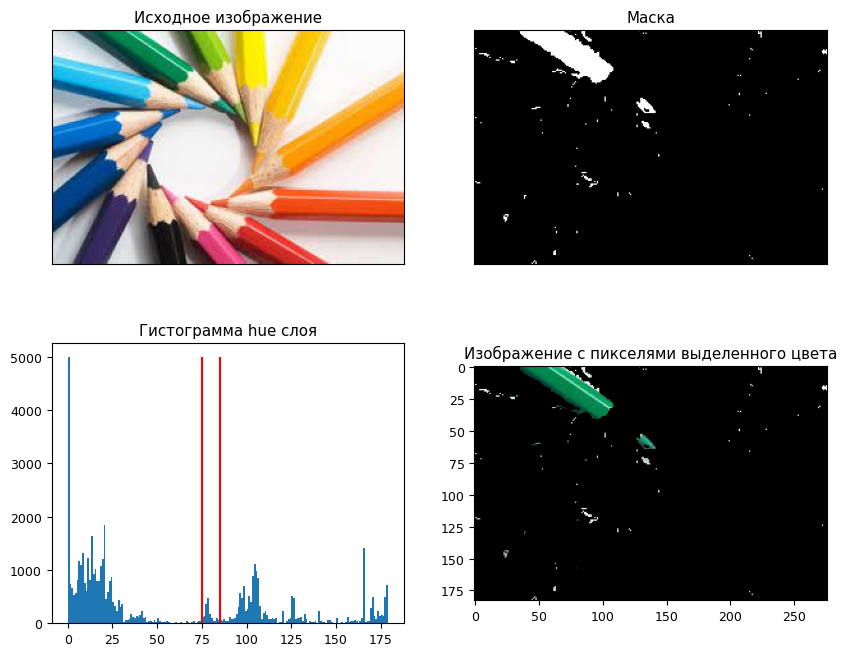

In [22]:
#Цветовая сегментация изображений
image3 = cv.imread('../images/pencils.png')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 75
high_h = 85

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма hue слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()